In [146]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline

red = pd.read_csv('Wine Project\winequality-red.csv', delimiter= ';')
white = pd.read_csv('Wine Project\winequality-white.csv', delimiter= ';')

In [147]:
# concat two data sets
red['type'] = 'red'
white['type'] = 'white'
all_wine = pd.concat([red, white], ignore_index=True)

all_wine['quality_label'] = all_wine['quality'].apply(
    lambda value: 'low'
    if value <= 5 else 'medium'
    if value <= 7 else 'high'
)

In [148]:
x = all_wine.copy(deep=True)

In [149]:
# leave only fields that are not correlated with each other for the training
X = x[[
    'residual sugar',
    'chlorides',
    'total sulfur dioxide',
    'pH',
    'sulphates',
    'alcohol'
]]

In [150]:
y = all_wine['quality_label']

print(X.shape)
print(y.shape)

(6497, 6)
(6497,)


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [152]:
quality_label = LabelEncoder()

In [153]:
#Scaler
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform data
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

c:\Users\Lucia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


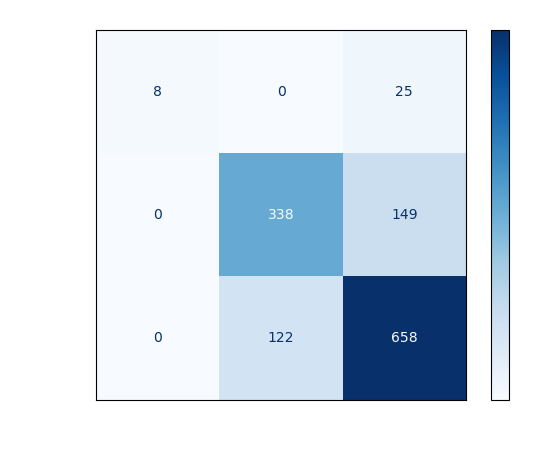

In [154]:
# Random Forest Classifier give 84 %

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

color = 'white'
matrix = plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color) 
plt.show()

In [155]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

kappa = cohen_kappa_score(pred_rfc, y_test)
print("Cohen-Kappa score:", kappa)
# random for give 84%

              precision    recall  f1-score   support

        high       1.00      0.24      0.39        33
         low       0.73      0.69      0.71       487
      medium       0.79      0.84      0.82       780

    accuracy                           0.77      1300
   macro avg       0.84      0.59      0.64      1300
weighted avg       0.78      0.77      0.77      1300

Cohen-Kappa score: 0.528867862617477


In [156]:
# Support Vector Classifier give 34 %

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, pred_svc, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

Confusion matrix:


,low,medium,high
low,0,0,33
medium,0,7,480
high,0,10,770


In [157]:
print(classification_report(y_test, pred_svc))

# Support Vector Classifier give 34%

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        33
         low       0.41      0.01      0.03       487
      medium       0.60      0.99      0.75       780

    accuracy                           0.60      1300
   macro avg       0.34      0.33      0.26      1300
weighted avg       0.51      0.60      0.46      1300



c:\Users\Lucia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lucia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lucia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


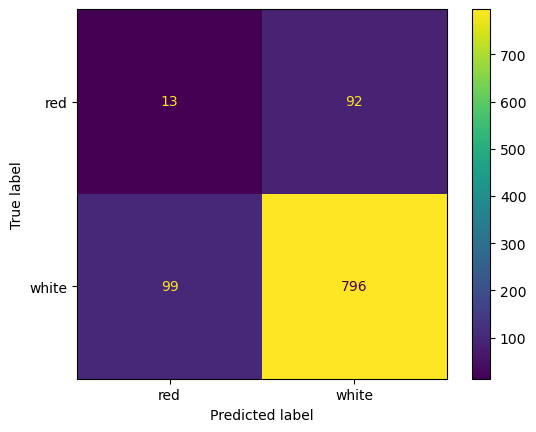

In [158]:
# Decision Tree give 70 %

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['red', 'white'])

cm_display.plot()
plt.show() 

In [163]:
#print confusion matrix and accuracy score
dt_predict = dt.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, dt_predict= dt.predict(X_test))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
# Decision Tree give 70 %

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
# NaiveBayes give 67 %
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)

In [ ]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[  0   2  31]
 [  0 273 214]
 [  0 179 601]]
67.23076923076923


In [ ]:
# Logistic Regression give 65 %

model = LogisticRegression()                   
model.fit(X_train, y_train)                     
y_model = model.predict(X_test)                
print(accuracy_score(y_test, y_model))

0.6538461538461539


c:\Users\Lucia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
